stage 1:
data preperation stage

- prepare the data. load from external sourec and convert it to appropriate format for model training. 
- load this data and convert it to numeric values in the form of tensors. 
- these tensors act as inputs to the model during the training stage. 
- in training, they are preprocessed via transforms and grouped into batches.

stage 2:
experimentation and development
- train model, test performance and optimize our hyperparameters to improve performance to desired level. 
- pytorch provides modules in torch.nn module to help create and train neural networks. 
- we define loss function and select an optimizer
- backprop is performed and model parameters are updated. 
- within each epoch, we also validate our model using validation data.
- finally model is passed to test data and performance is measured. 

stage 3:
model deployment 
- fully trained model can be put on pytorch hub or edge device or local server
- it may also be put on cloud server after some postprocessing

- pytorch provides built in classes and utilities such as Dataset, DataLoader and Sampler classes for loading various types of data. 
- Dataset class defines how to access and preprocess data from file or data sources. 
- Sampler class defines how to sample data from dataset  in order to create batches. 
- DataLoader class combines dataset with a sampler and allows you to iterate over a set of batches. 
- pytorch libraries such as Torchvision and Torchtext provide classes to support computer vision data and natural language data. 
- torchvision.datasets module provides number of subclasses to load image data from popular academic datasets. 
- CIFAR-10 consists of 50k training and 10k testing for 10 possible objects. 

In [1]:
from torchvision.datasets import CIFAR10

train_data = CIFAR10(root = './train', train=True, download=True)

Files already downloaded and verified


In [2]:
# printing general information
print(train_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train
    Split: Train


In [3]:
# number of data samples
print(len(train_data))

50000


In [4]:
print(train_data.data.shape)
# 50000 images, each is 32x32 with 3 channels

(50000, 32, 32, 3)


In [5]:
print(train_data.targets[:10])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [6]:
print(train_data.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [7]:
print(train_data.class_to_idx)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [8]:
print(type(train_data[0]))

<class 'tuple'>


In [9]:
print(len(train_data[0]))

2


In [10]:
data, label = train_data[0]

In [11]:
print(type(data))

<class 'PIL.Image.Image'>


In [12]:
print(data)

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F59A8430F90>


PIL is a common image format that uses Pillow Library to store image pixel values in the format of height x width x channels. 

In [13]:
print(type(label))

<class 'int'>


In [14]:
print(label)

6


In [15]:
print(train_data.classes[label])

frog


- loading the test data
- changing root folder and setting train = False will work

In [ ]:
test_data = CIFAR10(root = './test/', train = False, download = True)
print(test_data)

- data needs to be adjusted before it's passed to the NN model.
- adjustments include normalization, type conversion from object to tensor etc.,
- can be perfomed by applying transforms. 
- in pytorch, a sequence of transforms can be defined and can be applied later when data is accessed. 
- can be performed using cpu and gpu parallelly. 

In [18]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding = 4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
            mean = (0.4914, 0.4822, 0.4465),
            std = (0.2023, 0.1994, 0.2010)
    )
])

train_data = CIFAR10(root = './train', train = True, download = True, transform = train_transforms)

Files already downloaded and verified


- mean and standard deviation numbers were predetermined based on the dataset. 
- transform method is used when creating the dataset itself. 
- transforms are defined using transform.Compose() method. 
- transforms used above are randomly cropping images, randomly flipping images, converting them to tensors, normalizing them to predetermined means and standard deviations. 

In [19]:
print(train_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [20]:
print(train_data.transforms)

StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [21]:
data, label = train_data[0]
print(type(data))
print(data.size())
print(data)

<class 'torch.Tensor'>
torch.Size([3, 32, 32])
tensor([[[-2.4291e+00, -2.4291e+00, -2.4291e+00,  ..., -2.4291e+00,
          -2.4291e+00, -2.4291e+00],
         [-1.2854e+00, -1.5955e+00, -1.4598e+00,  ...,  6.3375e-01,
           5.1744e-01,  4.3990e-01],
         [-2.1189e+00, -2.4291e+00, -2.0801e+00,  ..., -4.4721e-02,
          -1.2226e-01, -6.4106e-02],
         ...,
         [ 1.8356e+00,  1.4673e+00,  1.1765e+00,  ...,  9.2452e-01,
          -1.3435e+00, -1.7894e+00],
         [ 1.6030e+00,  1.4673e+00,  1.4091e+00,  ...,  6.7252e-01,
          -1.3435e+00, -1.4017e+00],
         [ 1.0602e+00,  9.2452e-01,  1.1765e+00,  ...,  1.1378e+00,
          -5.4873e-01, -8.2012e-01]],

        [[-2.4183e+00, -2.4183e+00, -2.4183e+00,  ..., -2.4183e+00,
          -2.4183e+00, -2.4183e+00],
         [-1.1989e+00, -1.5136e+00, -1.4742e+00,  ...,  1.7777e-01,
           4.0101e-02,  2.0434e-02],
         [-2.0249e+00, -2.4183e+00, -2.2609e+00,  ..., -6.8757e-01,
          -7.8591e-01, -7.072

In [30]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


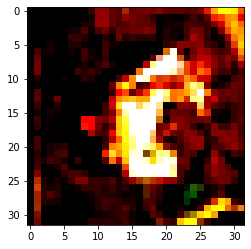

In [40]:
plt.imshow(data.permute(2,1,0))

- in the same way we can transform test data as well. 
- for example, converting to tensors is the only transform on test

In [ ]:
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
    (0.4914, 0.4822, 0.4465),
    (0.2023, 0.1994, 0.2010)
    )
])

test_data = CIFAR10(root='./test/', train=False, transform=test_transforms)

print(test_data)

print(test_data.transforms)